##1.2 A sphere example

This example follows on from the <a href="1.1_installing_librat.ipynb">installation of librat</a> and assumes you have librat up and running.

Here we are going to create height map looking down on a sphere. When you've finished you should produce an image that looks something like this.

<img src=img/sphere.png width=400>

In [1]:
import os
import platform
from run_start import *
from hips import hips2img
%matplotlib inline

In [6]:
# Just in case you haven't already added neccessary variables to environment variables
os.environ['BPMS'] = os.path.join(os.path.expanduser("~"), 'bpms')
os.environ['PATH'] += ':' + os.path.join(os.environ['BPMS'], 'bin/x86_64')
os.environ['PATH'] += ':' + os.path.join(os.environ['BPMS'], 'bin/csh')

if platform.system() == 'Darwin': # A Mac:
    os.environ['DYLD_LIBRARY_PATH'] = os.path.join(os.environ['BPMS'], 'src/lib')
else:
    os.environ['LD_LIBRARY_PATH'] = os.path.join(os.environ['BPMS'], 'src/lib')

##Files required to run librat

Librat requires a series of ASCII files to run (more details are provided in the next section):
- a <code>.obj</code> file.  This contains the scene geometry (e.g. ground, leaf, etc.) and references to the "materials" used to model the scene elements.  For the below example the object is called <code><span style="background-color: lightgrey">obj/sphere.obj</span></code>.
- a <code>.matllib</code> file that contains the relfectance values of the "materials" you want to represent in the scene (see next section for more details).  This can also contain relative paths to ASCII files with the reflectance/transmittacen values.  All values used here are referenced in a single file called <code><span style="background-color: lightgrey">materials.mattlib</span></code>.
- a <code>.camera</code> file that specifies the characteristics of the camera.
- a <code>.light</code> file that specifies the characteristics of the illumination source.</p>

<p>The latter two are not required for generating simple height maps and are introduced in <a href=3.0_mode_14_running_spectral_simulations.ipynb>Section 3</a>.

##Running librat from a terminal
As explained previously, librat is normally run from a terminal using commands such as:  

<p><code>echo <font color=red>16</font> <font color=blue>0 0 100000</font> <font color=green>200000 200000</font> <font color='pink'>512 512</font> <font color=black>1</font> <font color=orange>heightmap.hips</font> | <font color=brown>start</font> <font color=lightgreen>sphere.obj</font></code></p> 

where:

<code>echo</code> is required to PIPE the commands to <code><font color=brown>start</font></code>

<code><font color=red>16</font></code> is the librat running option, the ones we are mostly concerned with are <code><font color=red>16</font></code> (basic height map simualtions) and <code><font color=red>14</font></code> (spectral and lidar simulations - more on these in Section 3). 

When librat is run using mode <code><font color=red>16</font></code>, the other command line variables are:

<code><font color=blue>0 0 100000</font></code> the x, y, z location of the camera 

<code><font color=green>200000 200000</font></code> the x, y area of the scene

<code><font color='pink'>512 512</font></code> output image resolution

<code><font color=black>1</font></code> number of rays per pixel

<code><font color=orange>heightmap.hips </font></code> output image filename ( <code><span style="background-color: lightgrey">.hips</span></code> format)

This is then piped to:

<code><font color=brown>start</font></code> which is the command that runs librat, there are some extra options which will be introduced later

<code><font color=lightgreen>sphere.obj</font></code> is the <code><span style="background-color: lightgrey">.obj</span></code> file that contains references to the spectral material and the scene geometry

For these example we are going to call librat from with in Python, the syntax of the commands is the same though.

echo 16 0 0 100000 200000 200000 512 512 1 output/sphere.hips | start obj/sphere.obj
( 99.9996)              


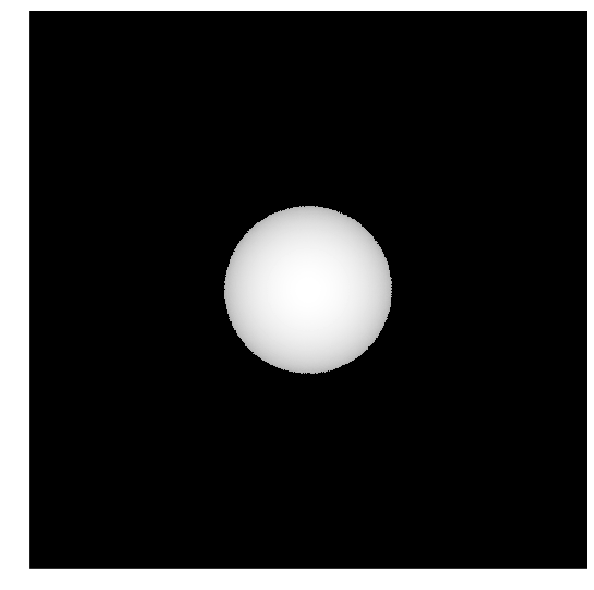

In [9]:
# the cmd is exactly what you type into the command line
cmd = "echo 16 0 0 100000 200000 200000 512 512 1 output/sphere.hips | start obj/sphere.obj"
print cmd
error = run_start(cmd)

# if there is an error this will appear as text below
if not error:
    hips2img('output/sphere.hips', order=[0], stretch=False)

# now try changing the x, y or z values or other variables